In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# import data

In [3]:
dataPhysics = pd.read_csv('PhysicsPublicationRecord.csv', encoding="ISO-8859-1")
dataChemistry = pd.read_csv('ChemistryPublicationRecord.csv', encoding="ISO-8859-1")
dataMedicine = pd.read_csv('MedicinePublicationRecord.csv', encoding="ISO-8859-1")

# data cleaning: exclude invalid data and nan

In [4]:
prizewinningPaperPhysics = dataPhysics[dataPhysics['Is prize-winning paper'] == 'YES']
prizewinningPaperChemistry = dataChemistry[dataChemistry['Is prize-winning paper'] == 'YES']
prizewinningPaperMedicine = dataMedicine[dataMedicine['Is prize-winning paper'] == 'YES']
    
prizewinningPaperPhysics = prizewinningPaperPhysics[~ prizewinningPaperPhysics['Pub year'].isnull()]
prizewinningPaperPhysics = prizewinningPaperPhysics[prizewinningPaperPhysics['Prize year'] > prizewinningPaperPhysics['Pub year']]
prizewinningPaperChemistry = prizewinningPaperChemistry[~ prizewinningPaperChemistry['Pub year'].isnull()]
prizewinningPaperChemistry = prizewinningPaperChemistry[prizewinningPaperChemistry['Prize year'] > prizewinningPaperChemistry['Pub year']]
prizewinningPaperMedicine = prizewinningPaperMedicine[~ prizewinningPaperMedicine['Pub year'].isnull()]
prizewinningPaperMedicine = prizewinningPaperMedicine[prizewinningPaperMedicine['Prize year'] > prizewinningPaperMedicine['Pub year']]

# compute total number of papers published by each laureate

In [5]:
dataPhysics = dataPhysics.set_index('Laureate ID') 
totalNumPhysics = dataPhysics.groupby(['Laureate ID']).size()
totalNumPhysics = totalNumPhysics.rename('total number of paper')

In [6]:
dataChemistry = dataChemistry.set_index('Laureate ID') 
totalNumChemistry = dataChemistry.groupby(['Laureate ID']).size()
totalNumChemistry = totalNumChemistry.rename('total number of paper')

In [7]:
dataMedicine = dataMedicine.set_index('Laureate ID') 
totalNumMedicine = dataMedicine.groupby(['Laureate ID']).size()
totalNumMedicine = totalNumMedicine.rename('total number of paper')

# compute number of papers published before prize-winning paper for each laureate

In [8]:
prizewinningPaperPhysics = prizewinningPaperPhysics.set_index('Laureate ID') 
tempdfPhysics = prizewinningPaperPhysics.groupby(level=0)['Pub year'].min()
tempdfPhysics = tempdfPhysics.rename('prize-winning paper pub year')
dataPhysics = pd.merge(dataPhysics, tempdfPhysics, on = 'Laureate ID')
dataPhysics['early paper'] = dataPhysics['Pub year'] < dataPhysics['prize-winning paper pub year']
earlyPaperPhysics = dataPhysics.groupby(['Laureate ID'])['early paper'].sum()

In [9]:
prizewinningPaperChemistry = prizewinningPaperChemistry.set_index('Laureate ID') 
tempdfChemistry = prizewinningPaperChemistry.groupby(level=0)['Pub year'].min()
tempdfChemistry = tempdfChemistry.rename('prize-winning paper pub year')
dataChemistry = pd.merge(dataChemistry, tempdfChemistry, on = 'Laureate ID')
dataChemistry['early paper'] = dataChemistry['Pub year'] < dataChemistry['prize-winning paper pub year']
earlyPaperChemistry = dataChemistry.groupby(['Laureate ID'])['early paper'].sum()

In [10]:
prizewinningPaperMedicine = prizewinningPaperMedicine.set_index('Laureate ID') 
tempdfMedicine = prizewinningPaperMedicine.groupby(level=0)['Pub year'].min()
tempdfMedicine = tempdfMedicine.rename('prize-winning paper pub year')
dataMedicine = pd.merge(dataMedicine, tempdfMedicine, on = 'Laureate ID')
dataMedicine['early paper'] = dataMedicine['Pub year'] < dataMedicine['prize-winning paper pub year']
earlyPaperMedicine = dataMedicine.groupby(['Laureate ID'])['early paper'].sum()

# compute ratio of early paper number (papers published before prize-winning paper) over total paper number

In [11]:
ratioPhysics = pd.merge(earlyPaperPhysics, totalNumPhysics, on = 'Laureate ID')
ratioPhysics['percentage'] = np.divide(ratioPhysics['early paper'], ratioPhysics['total number of paper']) * 100

In [12]:
ratioChemistry = pd.merge(earlyPaperChemistry, totalNumChemistry, on = 'Laureate ID')
ratioChemistry['percentage'] = np.divide(ratioChemistry['early paper'], ratioChemistry['total number of paper']) * 100

In [13]:
ratioMedicine = pd.merge(earlyPaperMedicine, totalNumMedicine, on = 'Laureate ID')
ratioMedicine['percentage'] = np.divide(ratioMedicine['early paper'], ratioMedicine['total number of paper']) * 100

# plot histograms

Text(0.5, 1.0, 'The geniuses show talents at the early stage of their career')

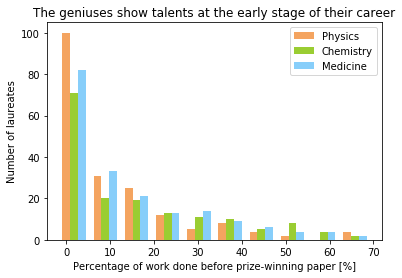

In [30]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(ratioPhysics['percentage'])
b_heights, b_bins = np.histogram(ratioChemistry['percentage'], bins=a_bins)
c_heights, c_bins = np.histogram(ratioMedicine['percentage'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/4

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='sandybrown', label = 'Physics')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='yellowgreen', label = 'Chemistry')
ax.bar(c_bins[:-1]+2*width, c_heights, width=width, facecolor='lightskyblue', label = 'Medicine')
plt.legend(loc='upper right')
plt.xlabel('Percentage of work done before prize-winning paper [%]')
plt.ylabel('Number of laureates')
plt.title('The geniuses show talents at the early stage of their career')

## Even though we believe that efforts would change the game, we have to admit that the geniuses already win it at the beginning. 

# ----------------------------------------------------------------------------

# Compute the lag time between the prize-winning paper was published and Nobel prize was won.

# Linear regression between prize year and lag time

In [32]:
#%%
    regr1 = linear_model.LinearRegression()
    regr2 = linear_model.LinearRegression()
    regr3 = linear_model.LinearRegression()
    regr1.fit(prizewinningPaperPhysics['Prize year'].values.reshape(-1, 1), \
             prizewinningPaperPhysics['Prize year'] - prizewinningPaperPhysics['Pub year'])
    regr2.fit(prizewinningPaperChemistry['Prize year'].values.reshape(-1, 1), \
             prizewinningPaperChemistry['Prize year'] - prizewinningPaperChemistry['Pub year'])
    regr3.fit(prizewinningPaperMedicine['Prize year'].values.reshape(-1, 1), \
             prizewinningPaperMedicine['Prize year'] - prizewinningPaperMedicine['Pub year'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

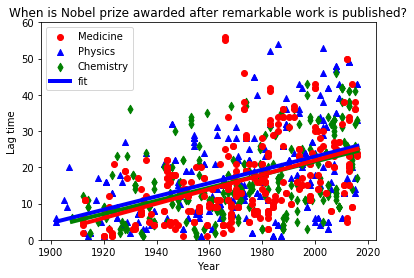

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(prizewinningPaperPhysics['Prize year'], \
                prizewinningPaperPhysics['Prize year'] - prizewinningPaperPhysics['Pub year'],\
                marker = '^', color = 'blue', label = 'Physics')
ax.scatter(prizewinningPaperChemistry['Prize year'], \
                prizewinningPaperChemistry['Prize year'] - prizewinningPaperChemistry['Pub year'],\
                marker = 'd', color = 'green', label = 'Chemistry')
ax.scatter(prizewinningPaperMedicine['Prize year'], \
                prizewinningPaperMedicine['Prize year'] - prizewinningPaperMedicine['Pub year'], \
                color = 'red', label = 'Medicine')   
    
plt.ylim((0,60))
plt.xlabel('Year')
plt.ylabel('Lag time')
plt.title('When is Nobel prize awarded after remarkable work is published?')
#    plt.legend(['Physics','Chemistry','Medicine','fit'])
    
ax.plot(prizewinningPaperPhysics['Prize year'].values, \
             regr1.predict(prizewinningPaperPhysics['Prize year'].values.reshape(-1, 1)), color='blue', linewidth=4, label = 'fit')
ax.plot(prizewinningPaperChemistry['Prize year'].values, \
             regr2.predict(prizewinningPaperChemistry['Prize year'].values.reshape(-1, 1)), color='green', linewidth=4)
ax.plot(prizewinningPaperMedicine['Prize year'].values, \
             regr3.predict(prizewinningPaperMedicine['Prize year'].values.reshape(-1, 1)), color='red', linewidth=4)
    
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
#    ax.legend()    
plt.show()

## According to the above regression, the person who will win Nobel prize in 2020 has been waiting for 27 years in average, since his/her remarkable work was published.

# ----------------------------------------------------------------------------

# Find the journals show up most in Nobel prize laureates' publication lists

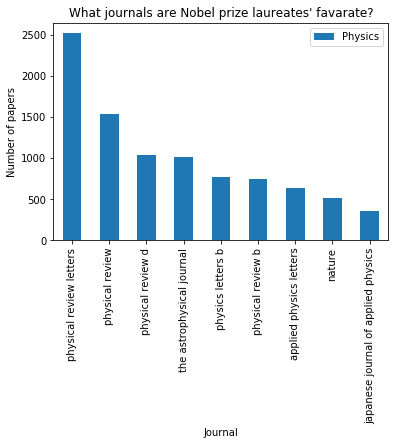

In [43]:
journalPhysics = dataPhysics.groupby('Journal').size()
journalPhysics = journalPhysics.rename('Number')
journalPhysics = journalPhysics.sort_values(ascending=False)

ax = journalPhysics[0:9].plot.bar(x='Index', y='Number', label = 'Physics')
plt.xticks(rotation=90)
plt.ylabel('Number of papers')
plt.title('What journals are Nobel prize laureates\' favarate?')
plt.legend(loc='upper right')


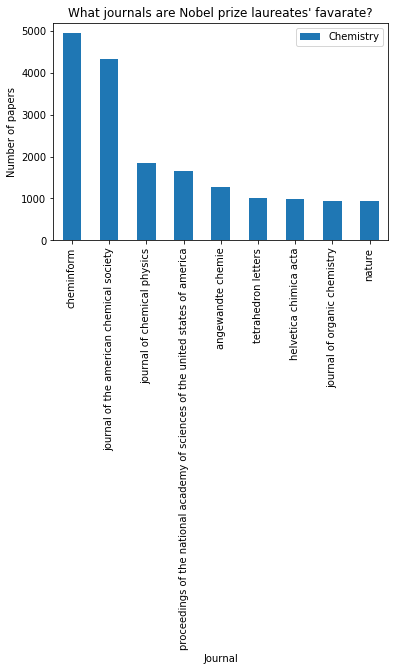

In [45]:
journalChemistry = dataChemistry.groupby('Journal').size()
journalChemistry = journalChemistry.rename('Number')
journalChemistry = journalChemistry.sort_values(ascending=False)

ax = journalChemistry[0:9].plot.bar(x='Index', y='Number', label = 'Chemistry')
plt.xticks(rotation=90)
plt.ylabel('Number of papers')
plt.title('What journals are Nobel prize laureates\' favarate?')
plt.legend(loc='upper right')

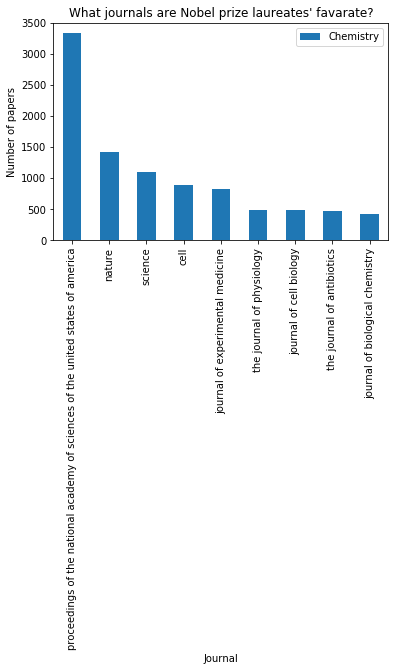

In [46]:
journalMedicine = dataMedicine.groupby('Journal').size()
journalMedicine = journalMedicine.rename('Number')
journalMedicine = journalMedicine.sort_values(ascending=False)

ax = journalMedicine[0:9].plot.bar(x='Index', y='Number', label = 'Chemistry')
plt.xticks(rotation=90)
plt.ylabel('Number of papers')
plt.title('What journals are Nobel prize laureates\' favarate?')
plt.legend(loc='upper right')